In [54]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame
unique_users = pd.read_csv('unique_users.csv')

# Define the stages
stages = ['Authorized', 'Created Profile', 'Verified ID', 'Filled personal card']

# List to hold each month's DataFrame
monthly_dfs = []

# Iterate through each row (month) in the DataFrame
for index, row in unique_users.iterrows():
    month = row['Period']
    data = {'number': [row[stage] for stage in stages], 'stage': stages}
    df_month = pd.DataFrame(data)
    df_month['month'] = month
    monthly_dfs.append(df_month)

# Concatenate all monthly DataFrames
df_combined = pd.concat(monthly_dfs, axis=0)

# Create the funnel chart
fig = px.funnel(df_combined, x='number', y='stage', color='month')
fig.update_layout(title="Cumulative User Engagement Funnel")
fig.show()


In [12]:
# Iterate through each row (month) in the DataFrame
for index, row in unique_users.iterrows():
    month = row['Period']
    authorized = row['Authorized']
    created_profile = row['Created Profile']
    verified_id = row['Verified ID']
    filled_card = row['Filled personal card']

    # Calculate conversion rates
    conv_to_created_profile = round(100 * created_profile / authorized, 2) if authorized else 0
    conv_to_verified_id = round(100 * verified_id / authorized, 2) if authorized else 0
    conv_to_filled_card = round(100 * filled_card / verified_id, 2) if verified_id else 0

    # Print the statement for each month in a more readable format
    print(f"Month: {month}\n"
          f"  - Total Users Authorized: {authorized}\n"
          f"  - Conversion to Created Profile: {conv_to_created_profile}%\n"
          f"  - Conversion to Verified ID: {conv_to_verified_id}%\n"
          f"  - Conversion to Filled Personal Card: {conv_to_filled_card}%\n")

Month: Jan 01 2023
  - Total Users Authorized: 15820
  - Conversion to Created Profile: 41.67%
  - Conversion to Verified ID: 32.36%
  - Conversion to Filled Personal Card: 33.71%

Month: Feb 01 2023
  - Total Users Authorized: 13825
  - Conversion to Created Profile: 38.13%
  - Conversion to Verified ID: 34.1%
  - Conversion to Filled Personal Card: 30.84%

Month: Mar 01 2023
  - Total Users Authorized: 13205
  - Conversion to Created Profile: 37.18%
  - Conversion to Verified ID: 34.75%
  - Conversion to Filled Personal Card: 29.57%

Month: Apr 01 2023
  - Total Users Authorized: 11767
  - Conversion to Created Profile: 36.75%
  - Conversion to Verified ID: 34.1%
  - Conversion to Filled Personal Card: 29.28%

Month: May 01 2023
  - Total Users Authorized: 10674
  - Conversion to Created Profile: 34.74%
  - Conversion to Verified ID: 30.18%
  - Conversion to Filled Personal Card: 29.8%

Month: Jun 01 2023
  - Total Users Authorized: 10740
  - Conversion to Created Profile: 33.6%
  - 

In [14]:
unique_users.columns

Index(['Period', 'Authorized', 'Created Profile', 'Verified ID',
       'Filled personal card', 'Specified price in the personal card',
       'Added partners in the peronal card',
       'Education filled in the personal card',
       'Experience filled in the personal card',
       'Photo added in the personal card', 'Received a bonus',
       'Topped up balance', 'Card added', 'Viewed application', 'Responded',
       'Connected with a client (call or message)', 'Had a call with a client',
       'Were picked by a client', 'Received a review', 'Received a payment',
       'Received a connect request (call or message)',
       'Received a good review', 'Received an average review',
       'Received a bad review', 'Were blocked', 'Deleted personal card',
       'Recovered personal card'],
      dtype='object')

In [22]:
# Define the new stages
new_stages = ['Specified price in the personal card', 'Added partners in the peronal card', 
              'Education filled in the personal card', 'Experience filled in the personal card', 
              'Photo added in the personal card']

# Prepare the data for the grouped bar chart
data = []
for index, row in unique_users.iterrows():
    month = row['Period']
    filled_card_count = row['Filled personal card']
    for stage in new_stages:
        completion_rate = row[stage] / filled_card_count * 100 if filled_card_count else 0
        data.append({'Month': month, 'Stage': stage, 'Completion Rate': completion_rate})

# Convert to DataFrame
df_monthly_completion = pd.DataFrame(data)

# Create the grouped bar chart
fig = px.bar(df_monthly_completion, x='Stage', y='Completion Rate', color='Month', barmode='group',
             title='Monthly Completion Rates of Personal Card Sections')

fig.show()

In [24]:
# Define the new stages for client interaction
client_interaction_stages = [
    'Viewed application', 
    'Responded', 
    'Connected with a client (call or message)', 
    'Had a call with a client', 
    'Were picked by a client', 
    'Received a review', 
    'Received a payment'
]

# List to hold each month's DataFrame
monthly_dfs = []

# Iterate through each row (month) in the DataFrame
for index, row in unique_users.iterrows():
    month = row['Period']
    data = {'number': [row[stage] for stage in client_interaction_stages], 'stage': client_interaction_stages}
    df_month = pd.DataFrame(data)
    df_month['month'] = month
    monthly_dfs.append(df_month)

# Concatenate all monthly DataFrames
df_combined = pd.concat(monthly_dfs, axis=0)

# Create the funnel chart
fig = px.funnel(df_combined, x='number', y='stage', color='month')
fig.update_layout(title="Cumulative Client Interaction Funnel")
fig.show()

In [27]:
# Iterate through each row (month) in the DataFrame
for index, row in unique_users.iterrows():
    month = row['Period']
    viewed_application = row['Viewed application']
    responded = row['Responded']
    connected_with_client = row['Connected with a client (call or message)']
    had_call_with_client = row['Had a call with a client']
    were_picked_by_client = row['Were picked by a client']
    received_review = row['Received a review']
    received_payment = row['Received a payment']

    # Calculate conversion rates
    conv_to_responded = round(100 * responded / viewed_application, 2) if viewed_application else 0
    conv_to_connected = round(100 * connected_with_client / viewed_application, 2) if viewed_application else 0
    conv_to_had_call = round(100 * had_call_with_client / connected_with_client, 2) if connected_with_client else 0
    conv_to_picked_by_client = round(100 * were_picked_by_client / had_call_with_client, 2) if had_call_with_client else 0
    conv_to_received_review = round(100 * received_review / were_picked_by_client, 2) if were_picked_by_client else 0
    conv_to_received_payment = round(100 * received_payment / were_picked_by_client, 2) if were_picked_by_client else 0

    # Print the statement for each month in a more readable format
    print(f"Month: {month}\n"
          f"  - Viewed Application: {viewed_application}\n"
          f"  - Conversion to Responded: {conv_to_responded}%\n"
          f"  - Conversion to Connected with Client: {conv_to_connected}%\n"
          f"  - Conversion to Had Call with Client: {conv_to_had_call}%\n"
          f"  - Conversion to Were Picked by Client: {conv_to_picked_by_client}%\n"
          f"  - Conversion to Received Review: {conv_to_received_review}%\n"
          f"  - Conversion to Received Payment: {conv_to_received_payment}%\n")

Month: Jan 01 2023
  - Viewed Application: 10664
  - Conversion to Responded: 43.79%
  - Conversion to Connected with Client: 34.19%
  - Conversion to Had Call with Client: 95.31%
  - Conversion to Were Picked by Client: 12.52%
  - Conversion to Received Review: 97.93%
  - Conversion to Received Payment: 2.3%

Month: Feb 01 2023
  - Viewed Application: 10011
  - Conversion to Responded: 38.77%
  - Conversion to Connected with Client: 30.28%
  - Conversion to Had Call with Client: 95.18%
  - Conversion to Were Picked by Client: 12.03%
  - Conversion to Received Review: 99.14%
  - Conversion to Received Payment: 3.46%

Month: Mar 01 2023
  - Viewed Application: 9279
  - Conversion to Responded: 30.51%
  - Conversion to Connected with Client: 25.49%
  - Conversion to Had Call with Client: 95.18%
  - Conversion to Were Picked by Client: 14.88%
  - Conversion to Received Review: 87.16%
  - Conversion to Received Payment: 4.18%

Month: Apr 01 2023
  - Viewed Application: 8240
  - Conversion 

In [29]:
def plot_count(df, cols, title_name):
    f, ax = plt.subplots(1, 2, figsize=(14, 7))
    plt.subplots_adjust(wspace=0.2)

    # Aggregate the counts for each column
    s1 = df[cols].sum()

    outer_sizes = s1
    inner_sizes = s1/s1.sum()

    outer_colors = ['#9E3F00', '#eb5e00', '#ff781f']
    inner_colors = ['#ff6905', '#ff8838', '#ffa66b']

    ax[0].pie(
        outer_sizes, colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, 
        explode=([0.05]*len(s1)),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {'size': 13, 'weight': 'bold', 'color': 'white'}
    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*len(s1)),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    sns.barplot(
        x=s1.values, y=s1.index, ax=ax[1],
        palette='YlOrBr_r', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='black', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel('Count', fontweight="bold", color='black')
    ax[1].set_ylabel('Review Type', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

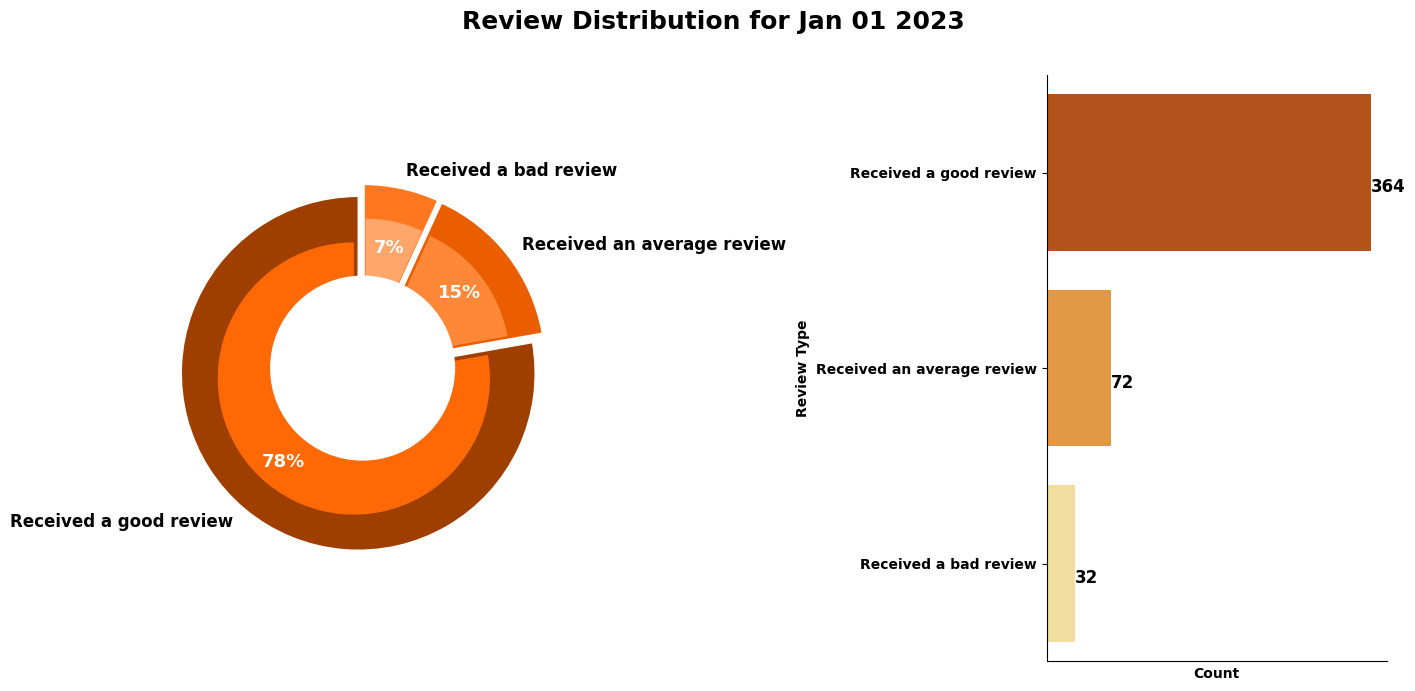

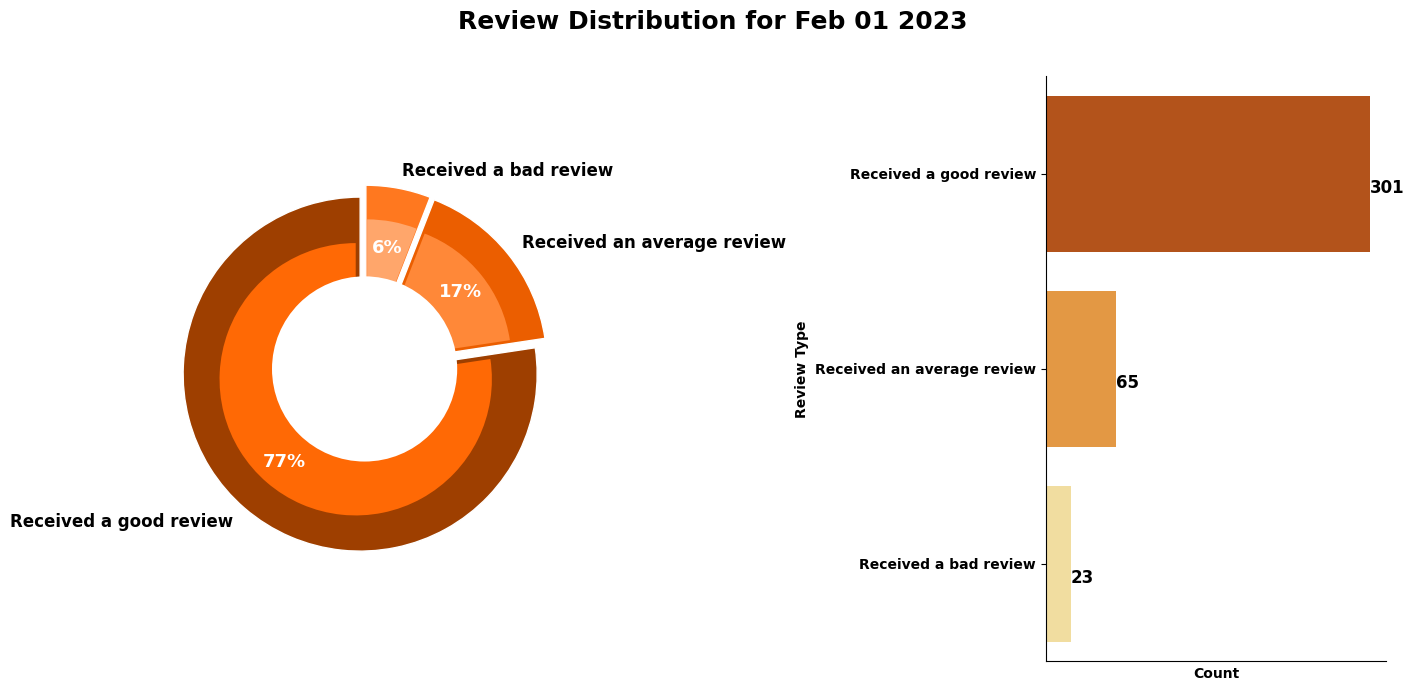

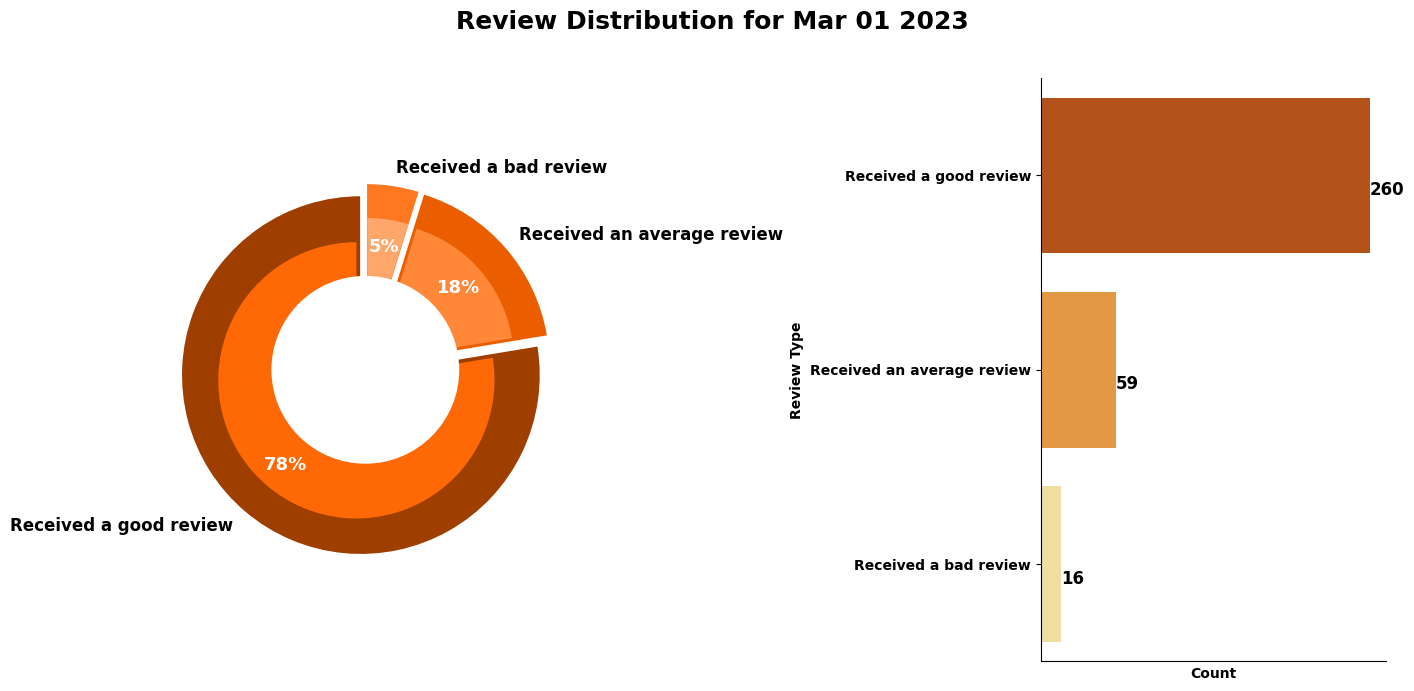

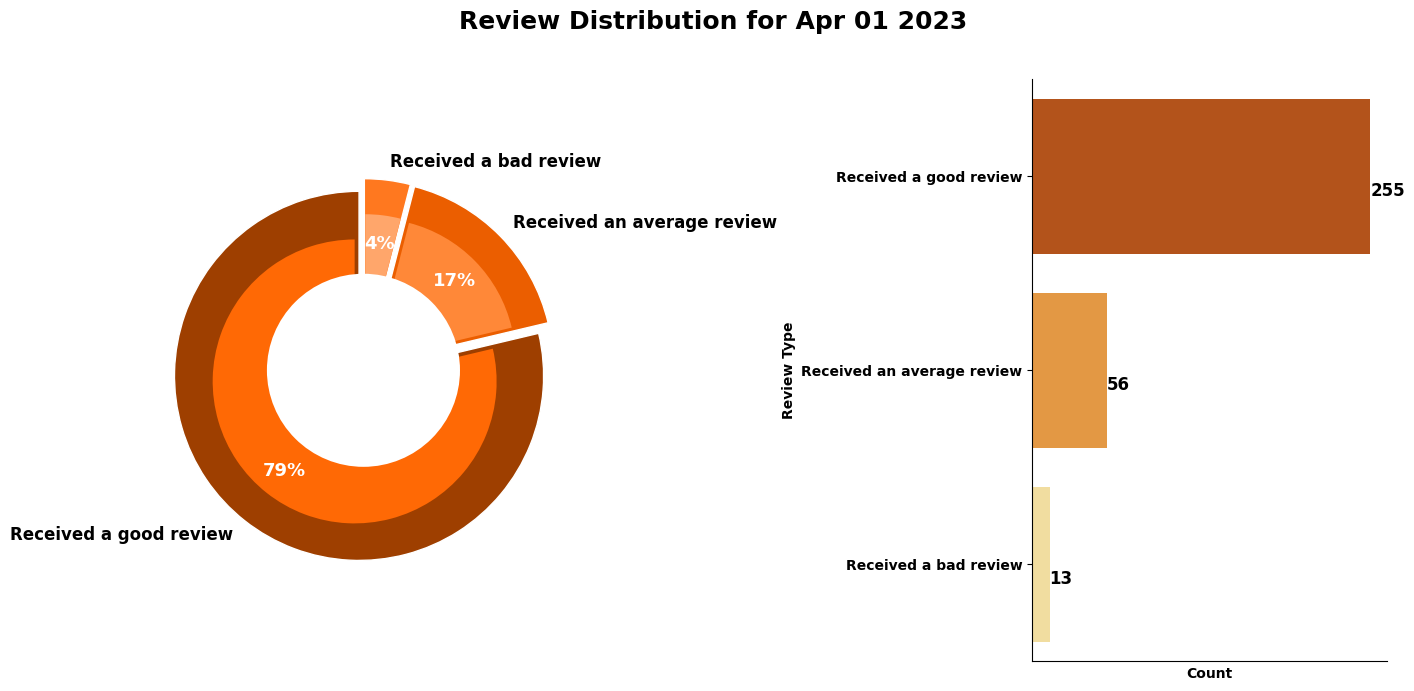

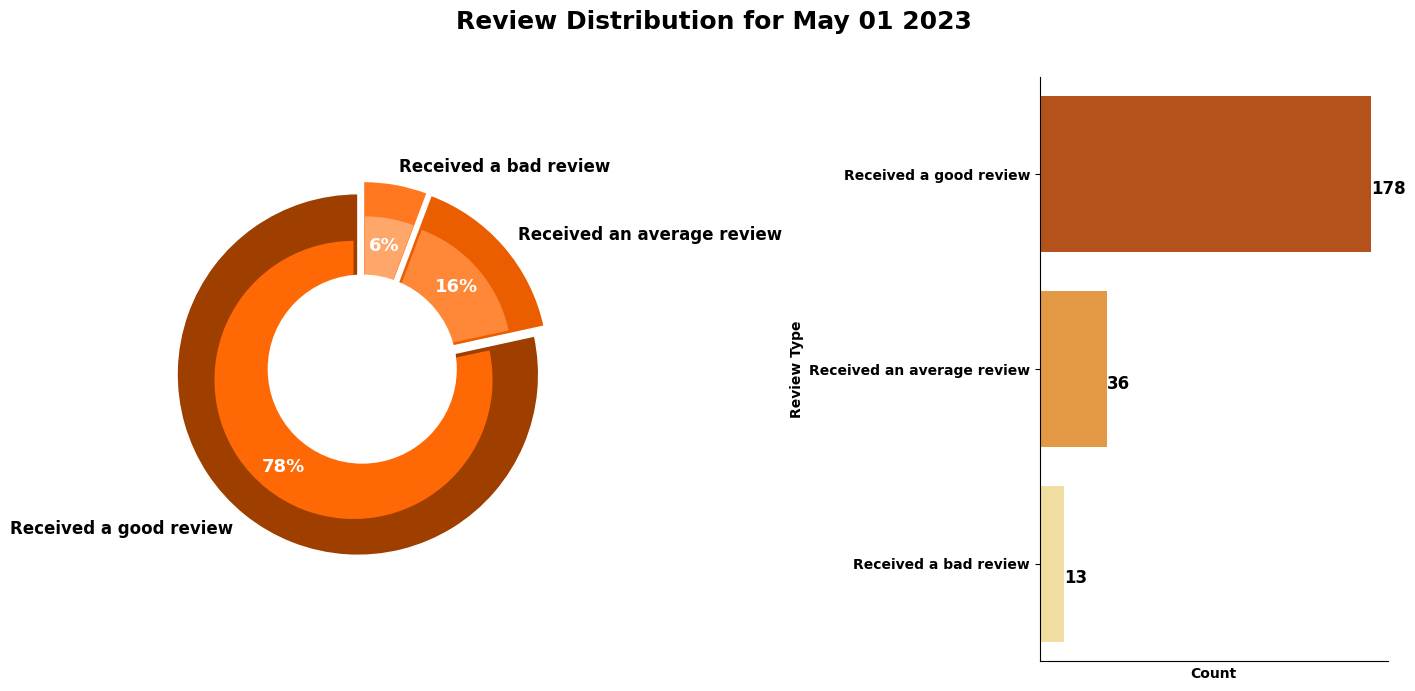

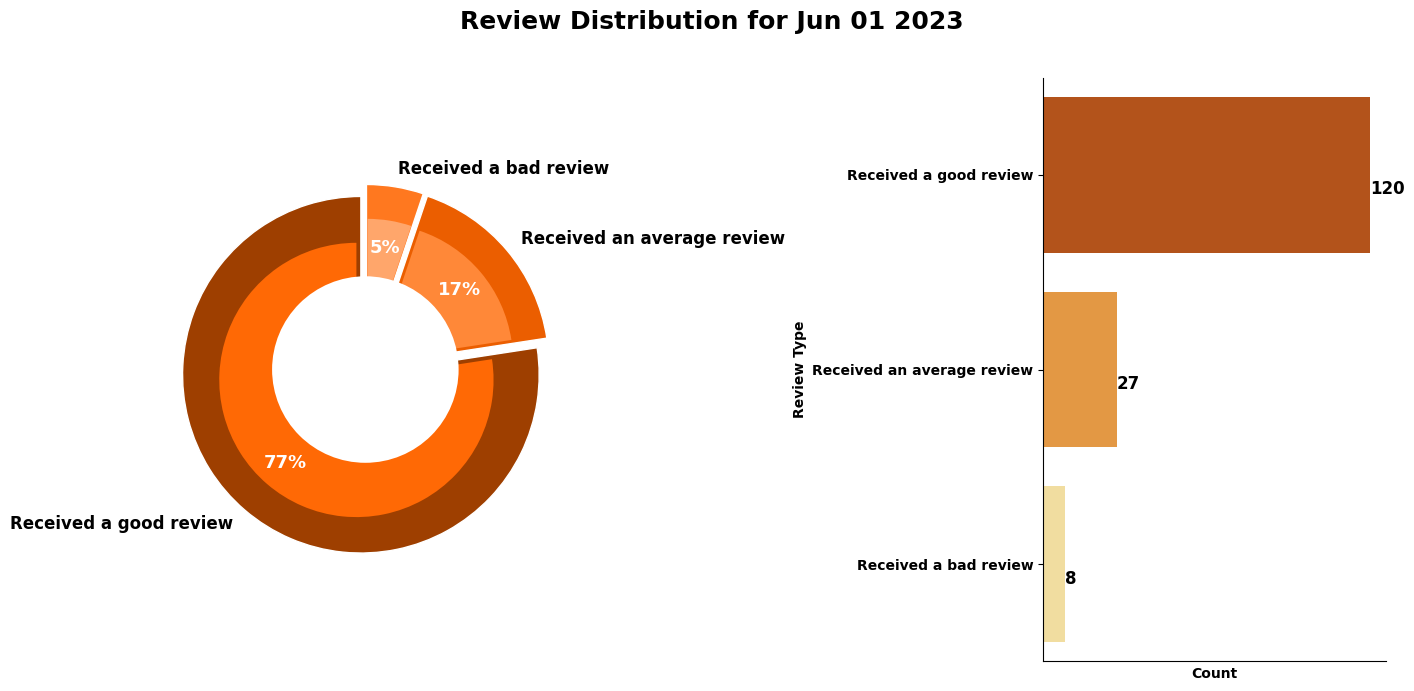

In [30]:
# Review columns
review_cols = ['Received a good review', 'Received an average review', 'Received a bad review']

# Iterate through each month
for index, row in unique_users.iterrows():
    month = row['Period']
    plot_count(row.to_frame().T, review_cols, f'Review Distribution for {month}')

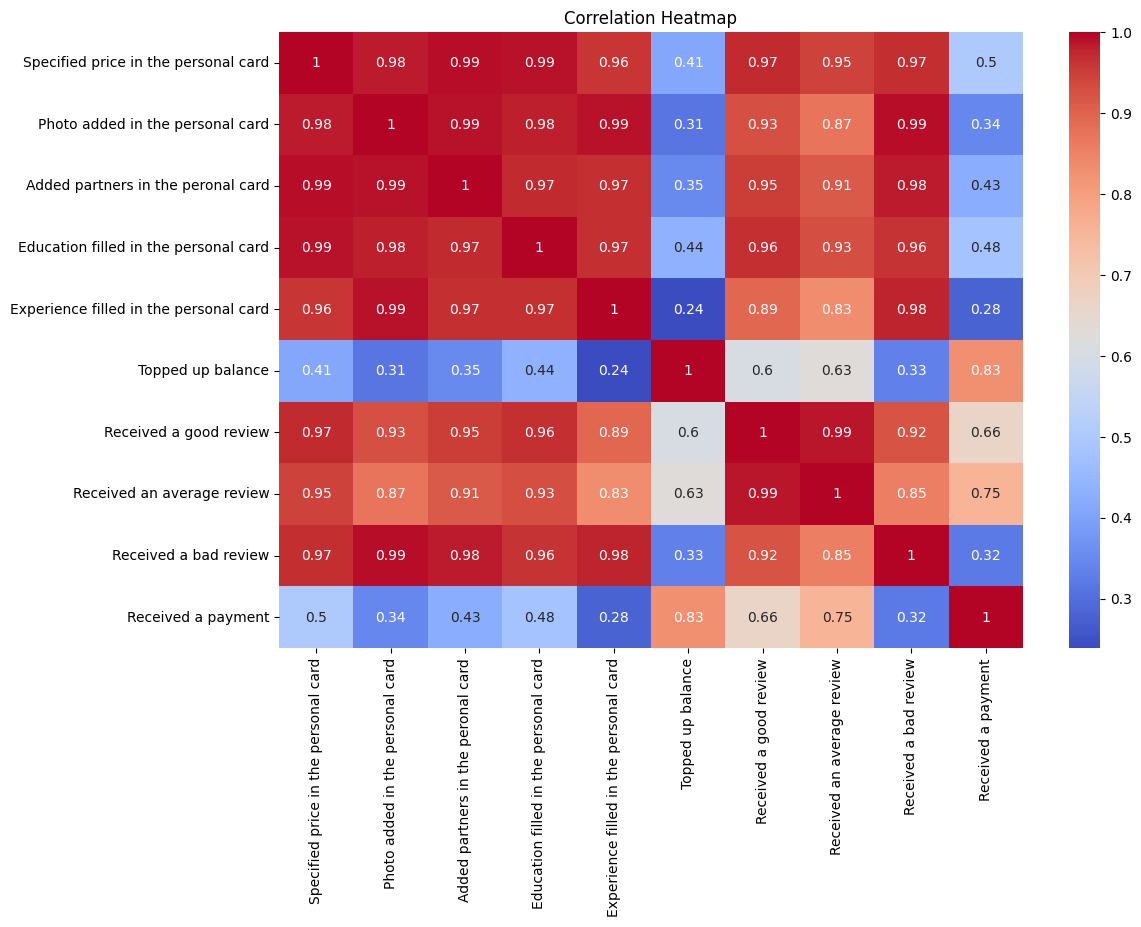

In [55]:
# Trying to build a correlation matrix
columns_of_interest = ['Specified price in the personal card', 'Photo added in the personal card',
                       'Added partners in the peronal card', 'Education filled in the personal card', 
                       'Experience filled in the personal card', 'Topped up balance', 'Received a good review', 
                       'Received an average review', 'Received a bad review','Received a payment']

# Calculate the correlation matrix
corr_matrix = unique_users[columns_of_interest].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
# Save the figure
plt.savefig('correlation_heatmap.png', format='png', dpi=300)
plt.show()

In [33]:
# Read the responses dataset for analyzing
responses = pd.read_csv('responses.csv')

responses.columns

Index(['Period', 'Total responses', 'Responses from created applications',
       'Connects from the catalogue',
       'Responses that had a contact with a client',
       'Responses resulted in being selected', 'Responses with a review',
       'Responses with a good review', 'Responses with an average review',
       'Responses with a bad review', 'Categories count with responses'],
      dtype='object')

In [35]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Period                                      6 non-null      object
 1   Total responses                             6 non-null      int64 
 2   Responses from created applications         6 non-null      int64 
 3   Connects from the catalogue                 6 non-null      int64 
 4   Responses that had a contact with a client  6 non-null      int64 
 5   Responses resulted in being selected        6 non-null      int64 
 6   Responses with a review                     6 non-null      int64 
 7   Responses with a good review                6 non-null      int64 
 8   Responses with an average review            6 non-null      int64 
 9   Responses with a bad review                 6 non-null      int64 
 10  Categories count with response

In [38]:
# Define the stages for the funnel
response_stages = ['Total responses', 'Responses that had a contact with a client', 'Responses resulted in being selected']

# List to hold each month's DataFrame
monthly_dfs = []

# Iterate through each row (month) in the DataFrame
for index, row in responses.iterrows():
    month = row['Period']
    data = {'number': [row[stage] for stage in response_stages], 'stage': response_stages}
    df_month = pd.DataFrame(data)
    df_month['month'] = month
    monthly_dfs.append(df_month)

# Concatenate all monthly DataFrames
df_combined = pd.concat(monthly_dfs, axis=0)

# Create the funnel chart
fig = px.funnel(df_combined, x='number', y='stage', color='month')
fig.update_layout(title="Response Engagement Funnel")
fig.show()

# Printing conversion rates for each month
for index, row in responses.iterrows():
    month = row['Period']
    total_responses = row['Total responses']
    contact_with_client = row['Responses that had a contact with a client']
    selected = row['Responses resulted in being selected']

    # Calculate conversion rates
    conv_to_contact = round(100 * contact_with_client / total_responses, 2) if total_responses else 0
    conv_to_selected = round(100 * selected / contact_with_client, 2) if contact_with_client else 0

    # Print the statement for each month
    print(f"Month: {month}\n"
          f"  - Total Responses: {total_responses}\n"
          f"  - Conversion to Contact with Client: {conv_to_contact}%\n"
          f"  - Conversion to Being Selected: {conv_to_selected}%\n")

Month: Jan 01 2023
  - Total Responses: 109770
  - Conversion to Contact with Client: 32.29%
  - Conversion to Being Selected: 2.69%

Month: Feb 01 2023
  - Total Responses: 90660
  - Conversion to Contact with Client: 32.32%
  - Conversion to Being Selected: 2.77%

Month: Mar 01 2023
  - Total Responses: 61195
  - Conversion to Contact with Client: 38.2%
  - Conversion to Being Selected: 3.4%

Month: Apr 01 2023
  - Total Responses: 53561
  - Conversion to Contact with Client: 44.18%
  - Conversion to Being Selected: 3.57%

Month: May 01 2023
  - Total Responses: 38571
  - Conversion to Contact with Client: 46.53%
  - Conversion to Being Selected: 3.11%

Month: Jun 01 2023
  - Total Responses: 21327
  - Conversion to Contact with Client: 51.44%
  - Conversion to Being Selected: 3.28%



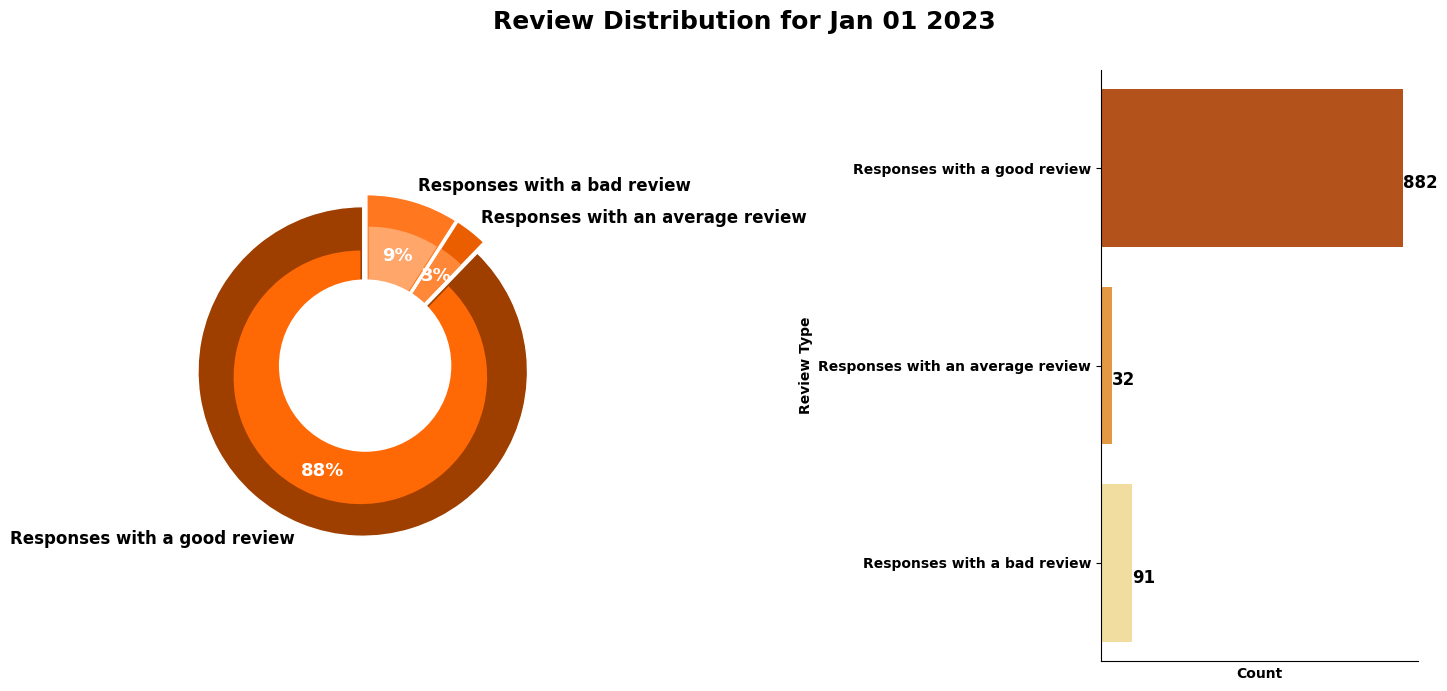

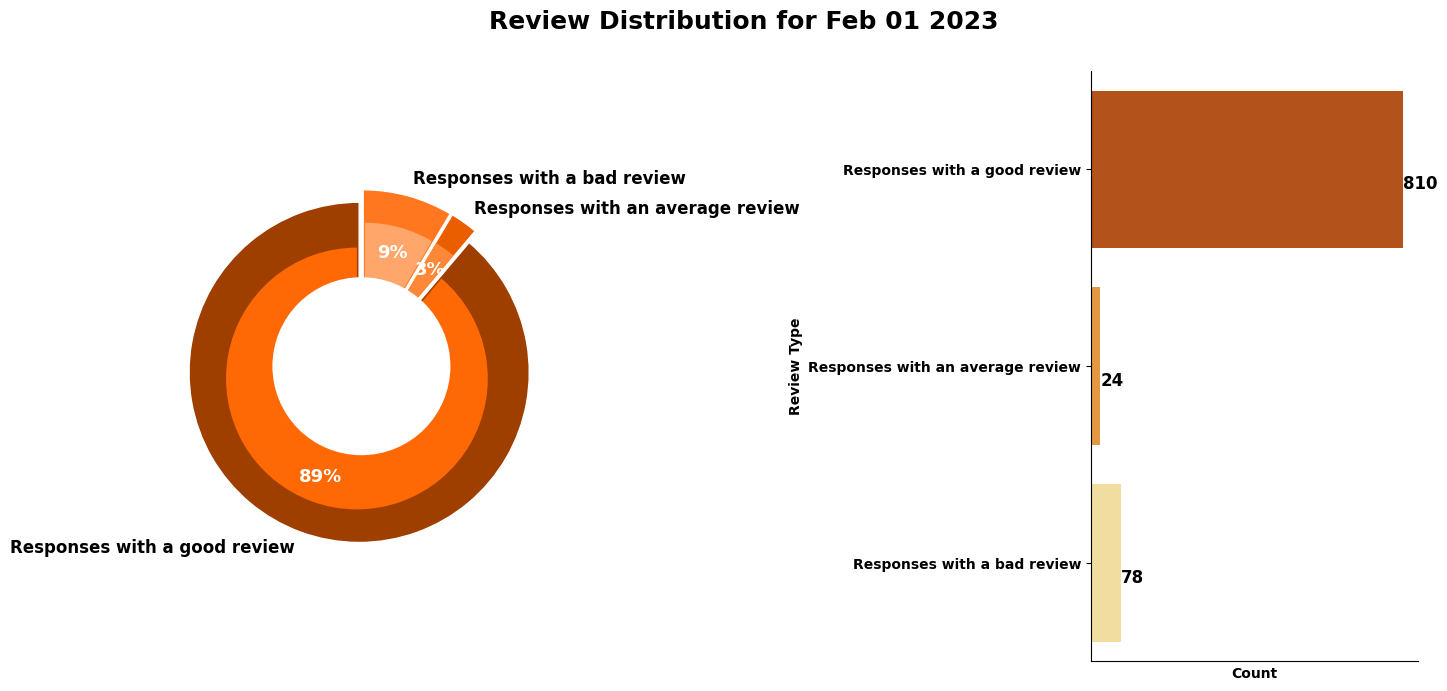

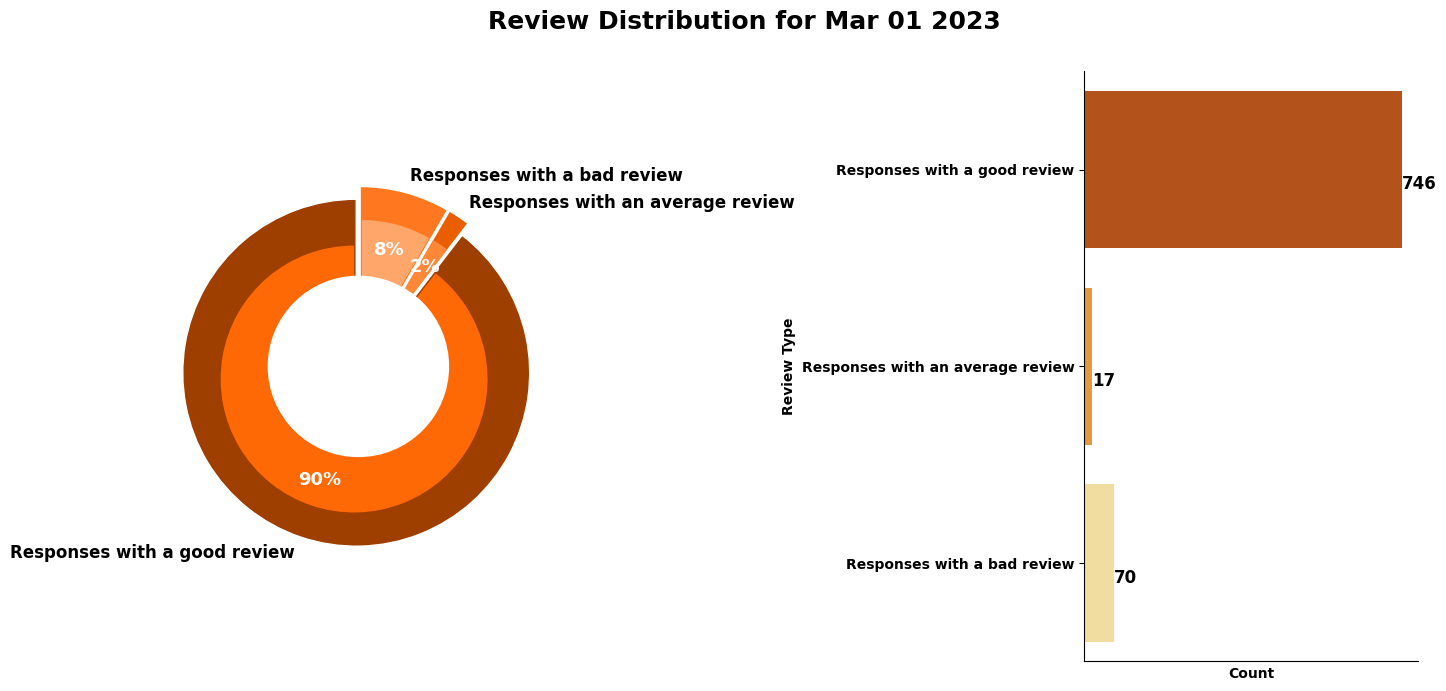

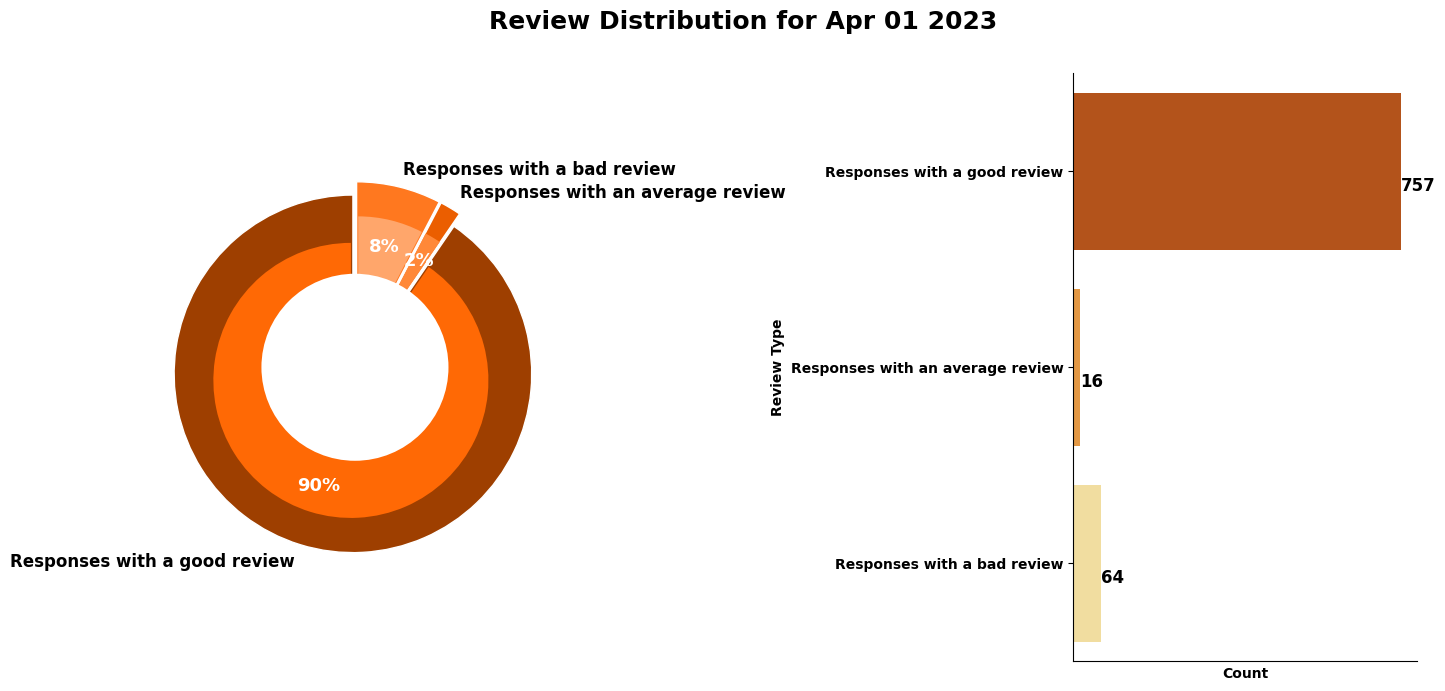

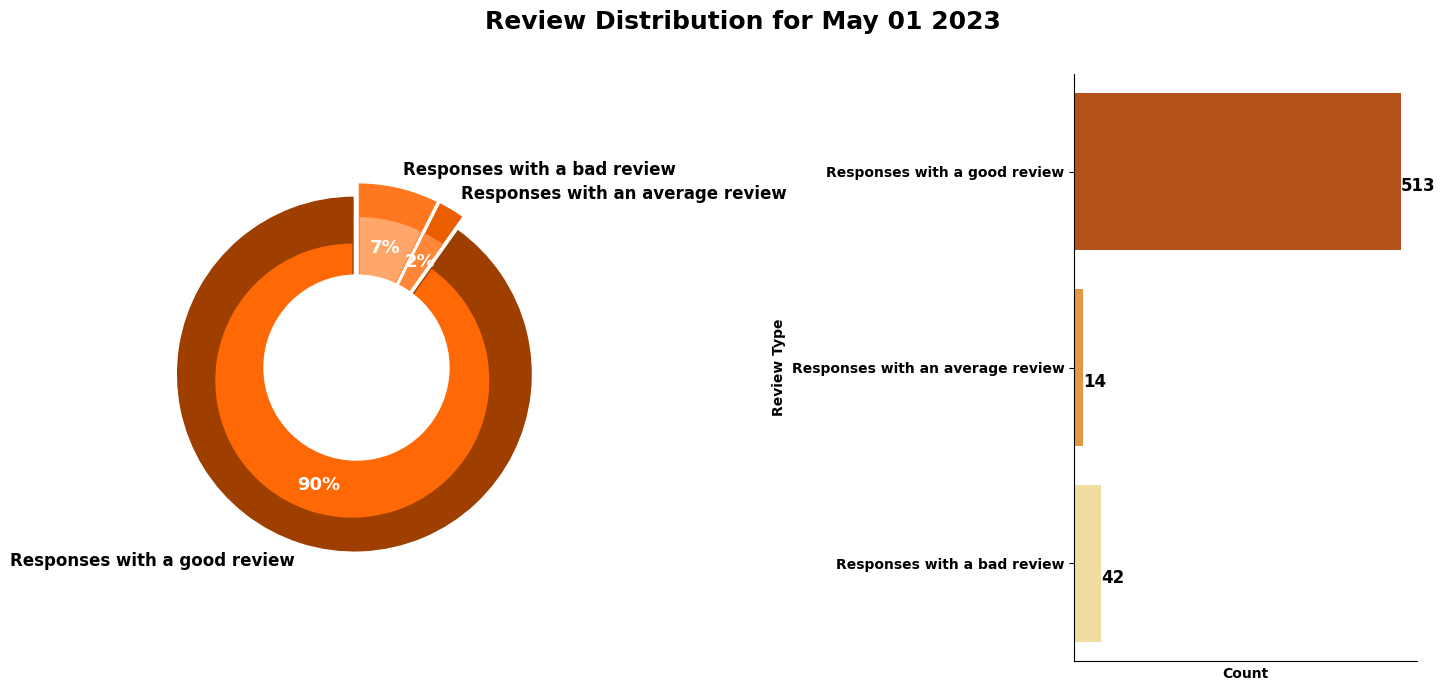

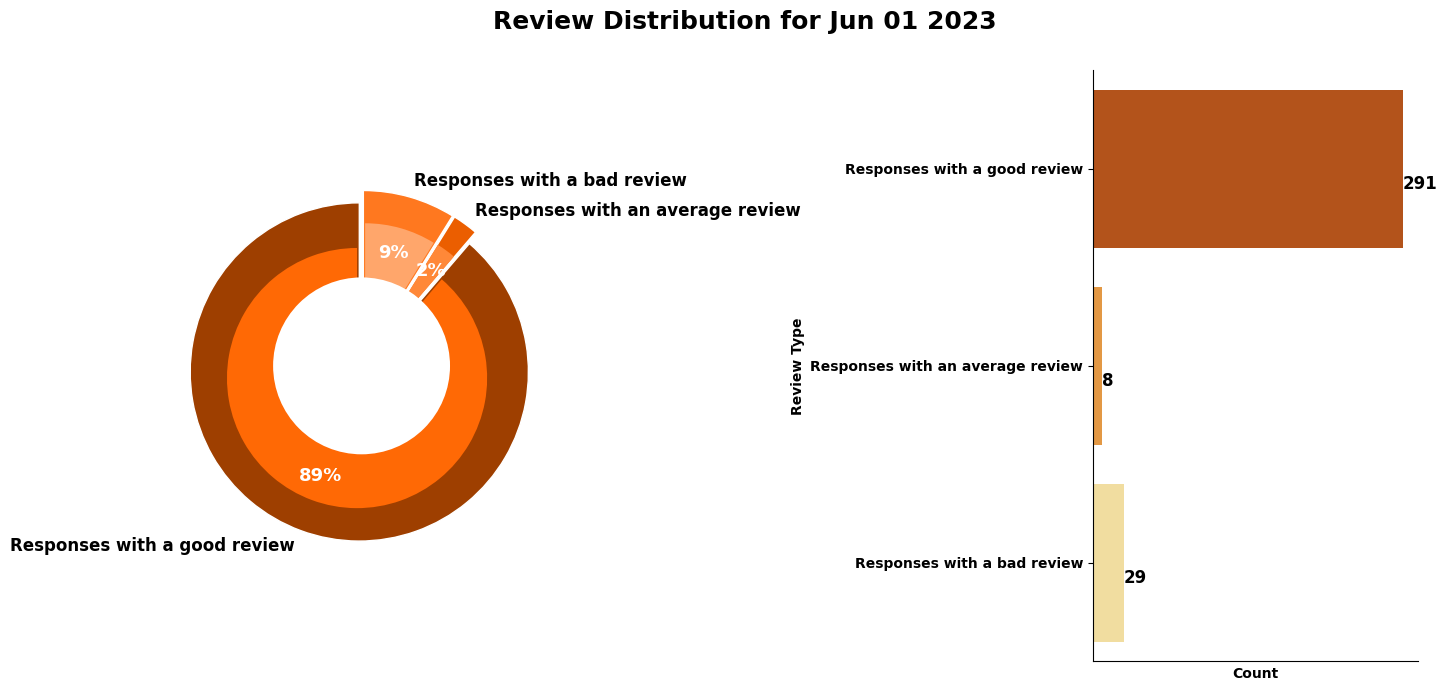

In [39]:
# Review columns
responses_review_cols = ['Responses with a good review', 'Responses with an average review','Responses with a bad review']

# Iterate through each month
for index, row in responses.iterrows():
    month = row['Period']
    plot_count(row.to_frame().T, responses_review_cols, f'Review Distribution for {month}')

In [50]:
financials = pd.read_csv('financials.csv')
financials.columns

Index(['Period', 'Sum of bonuses received', 'Sum of wallet top-ups',
       'Sum received by a specialist via app',
       'Sum received by a specialist based on sums mentioned by clients in reviews',
       'Sum received by a specialist based on reviews, if the sum is missing, the average sale price is taken'],
      dtype='object')

In [51]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   Period                                                                                                 6 non-null      object
 1   Sum of bonuses received                                                                                6 non-null      int64 
 2   Sum of wallet top-ups                                                                                  6 non-null      int64 
 3   Sum received by a specialist via app                                                                   6 non-null      int64 
 4   Sum received by a specialist based on sums mentioned by clients in reviews                             6 non-

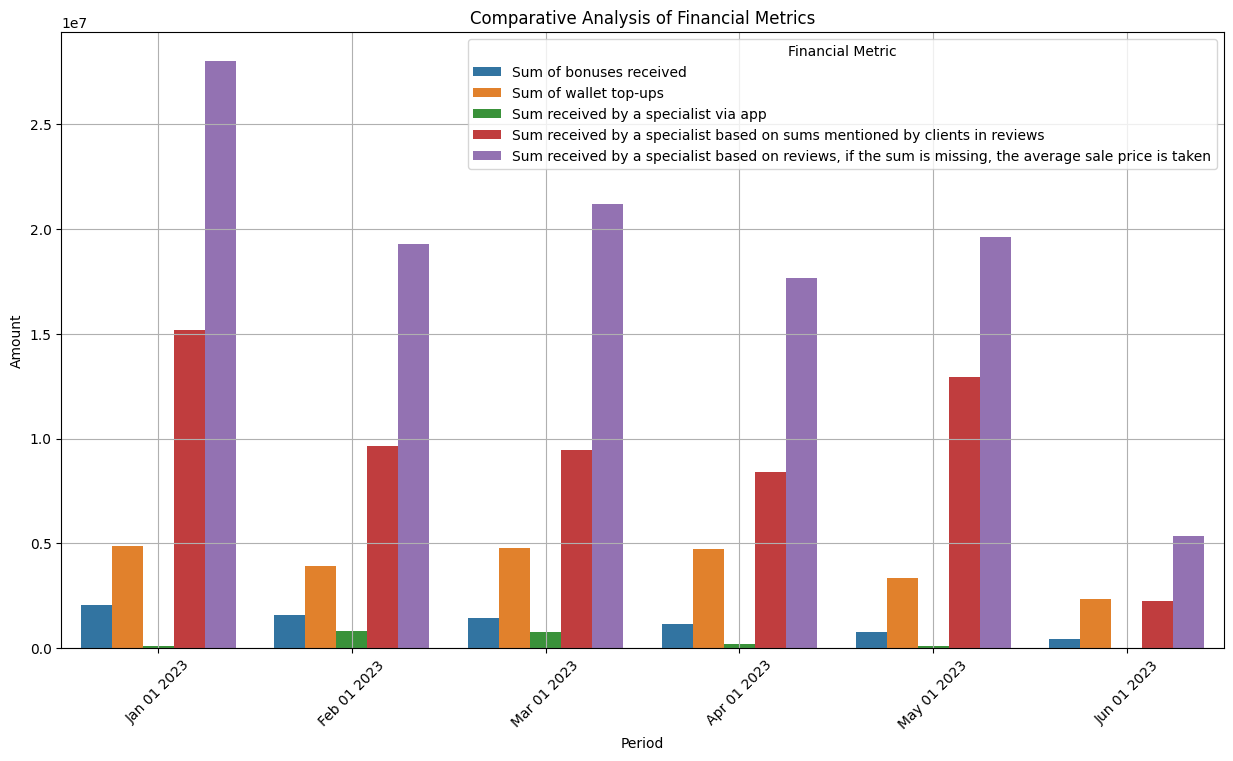

In [56]:
# Convert financial metrics to numeric types
financial_columns = financials.columns[1:]
financials[financial_columns] = financials[financial_columns].apply(pd.to_numeric, errors='coerce')

# # Check the data types and a sample of the data
# print(financials.dtypes)
# print(financials.head())

# Handle NaN values (optional, based on the output of the above print statements)
# financials.fillna(0, inplace=True)  # Uncomment this line to fill NaN values with 0

# Melt the DataFrame for easier plotting with seaborn
financials_melted = financials.melt(id_vars='Period', value_vars=financial_columns, 
                                    var_name='Financial Metric', value_name='Amount')

# Create a grouped bar chart
plt.figure(figsize=(15, 8))
sns.barplot(data=financials_melted, x='Period', y='Amount', hue='Financial Metric')
plt.title('Comparative Analysis of Financial Metrics')
plt.xlabel('Period')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Financial Metric')
plt.grid(True)
# Save the figure
plt.savefig('financials.png', format='png', dpi=300)
plt.show()